## Portfolio Variance Sample Calculation

In this notebook, a the portfolio variance will be calculated for a theoretical portfolio of 5 tech stocks, with random weights assigned, over the past 5 years.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

#### Get Data From Yahoo Finance & Calculate Daily Returns

,MSFT,GOOG,FB,AAPL,AMZN
Date,,,,,
2014-03-03,33.609142,597.459106,67.410004,66.669823,359.779999
2014-03-04,34.169590,603.529602,68.800003,67.109421,363.899994
2014-03-05,33.902721,605.193787,71.570000,67.250908,372.369995
2014-03-06,33.938305,605.864441,70.839996,67.047539,372.160004
2014-03-07,33.715904,603.470032,69.800003,67.008354,372.059998


,MSFT,GOOG,FB,AAPL,AMZN
Date,,,,,
2014-03-04,0.016675,0.010161,0.020620,0.006594,0.011451
2014-03-05,-0.007810,0.002757,0.040262,0.002108,0.023276
2014-03-06,0.001050,0.001108,-0.010200,-0.003024,-0.000564
2014-03-07,-0.006553,-0.003952,-0.014681,-0.000584,-0.000269
2014-03-10,-0.002111,-0.002651,0.031948,0.000905,-0.004112


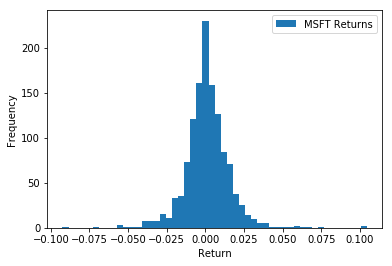

In [13]:
start_date = '2014-03-01'
end_date = '2019-03-01'

stocks = ['MSFT','GOOG','FB','AAPL','AMZN']
df = pd.DataFrame()

for stock in stocks:
    df[stock] = data.DataReader(stock, 'yahoo', start_date, end_date)['Adj Close']
display(df.head())    

#calculate percentage returns
df = df.pct_change()[1:]
display(df.head())

msft_returns = df['MSFT']
goog_returns = df['GOOG']
fb_returns = df['FB']
aapl_returns = df['AAPL']
amzn_returns = df['AMZN']

plt.hist(msft_returns, bins=50)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

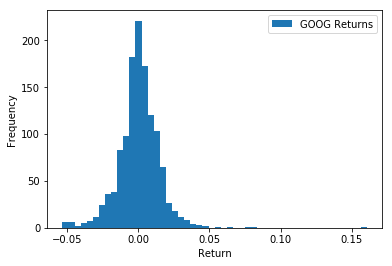

In [14]:
plt.hist(goog_returns, bins=50)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['GOOG Returns']);

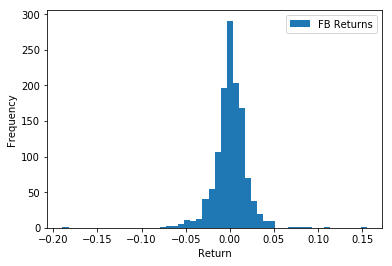

In [15]:
plt.hist(fb_returns, bins=50)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['FB Returns']);

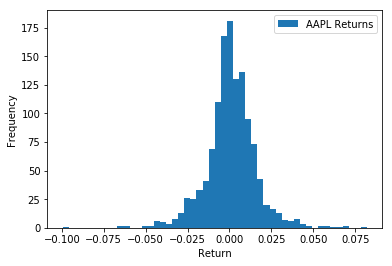

In [16]:
plt.hist(aapl_returns, bins=50)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['AAPL Returns']);

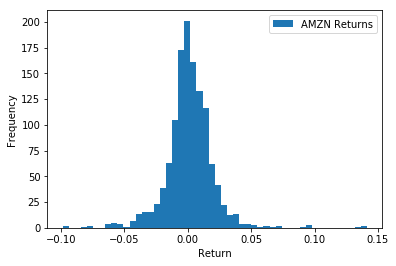

In [17]:
plt.hist(amzn_returns, bins=50)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['AMZN Returns']);

Mean daily returns for  ['MSFT', 'GOOG', 'FB', 'AAPL', 'AMZN'] :  [0.0010679958906108823, 0.0006233171188832083, 0.0008714141805671392, 0.000885105418450464, 0.0014084842544898229]


Return volatilities for  ['MSFT', 'GOOG', 'FB', 'AAPL', 'AMZN'] :  [0.014650976790017622, 0.014823478702645729, 0.018527298719851173, 0.015344381106437589, 0.01939491486614727]


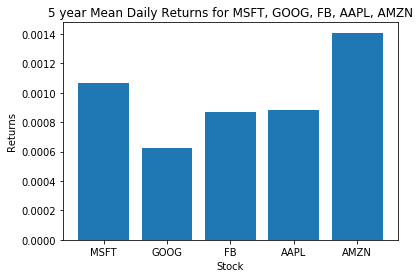

In [18]:
#create numpy array of 0s to store returns
returns = np.zeros((len(stocks), len(df)))
cum_returns = np.zeros((len(stocks), len(df)))

for i in range(0, len(stocks)): #N=10 - this represents the numer of assets
    R_i = df.iloc[:,i]
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    cum_returns[i] = np.cumprod(R_i)
    
mean_returns = [np.mean(R) for R in returns] #mean return of each of 5 assets over the last year
return_volatilities = [np.std(R) for R in returns]

print('Mean daily returns for ', str(stocks), ': ', str(mean_returns))
print('\n')
print('Return volatilities for ', str(stocks), ': ', str(return_volatilities))

plt.bar(stocks, mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('5 year Mean Daily Returns for MSFT, GOOG, FB, AAPL, AMZN');

#### Calculate Expected Return of Portfolio

Weights assigned to MSFT, GOOG, FB, AAPL, AMZN, respectively:  [0.4226161  0.13056851 0.08023495 0.18458645 0.181994  ]
Expected daily return of the portfolio:  0.1022 %
Expected cumulative return of the portfolio over 5 years:  362.0 %


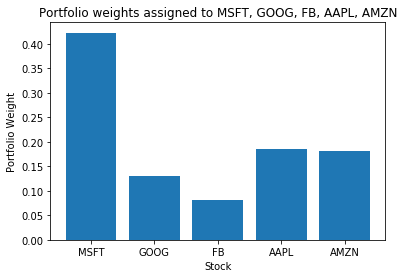

In [10]:
weights = np.random.uniform(0, 1, len(stocks)) #sample 5 weights from a uniform distribution between 0 and 1
weights = weights/np.sum(weights) #this scales the weights so they all sum to 1
print('Weights assigned to MSFT, GOOG, FB, AAPL, AMZN, respectively: ', weights)

plt.bar(stocks, weights)
plt.xlabel('Stock')
plt.ylabel('Portfolio Weight')
plt.title('Portfolio weights assigned to MSFT, GOOG, FB, AAPL, AMZN');

p_returns = np.dot(weights, mean_returns) #weighted sum of mean returns over the last year
print("Expected daily return of the portfolio: ", round(p_returns*100,4), "%")
print("Expected cumulative return of the portfolio over 5 years: ", round((1+p_returns)**(len(df)),2)*100, '%')

#### Calculate Portfolio Variance & Volatility
$$ VAR[P] = \sigma_P^2 = \sum_i \omega_i^2\sigma_i^2 + \sum_i\sum_{i\neq j} \omega_i\omega_j\sigma_i\sigma_j\rho_{i, j}, \ i, j \in \lbrace 1, 2, \cdots, N \rbrace $$
<br>
$$ \sigma_p^2 = \omega \ C \ \omega^\intercal$$

In [11]:
cov_mat = np.cov(returns) #this will be a 5x5 matrix, since there are 5 columns in returns
# print(cov_mat.shape)
# print(cov_mat)

# Calculating the portfolio volatility
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print("Portfolio volatility (standard deviation): ", round(vol_p*100,2), '%')

Portfolio volatility (standard deviation):  1.3 %
